# Logistic Regression
- dependent values are cont. -> Kategorik veriler çevrilmeli
- Prob. calculation 
- Veriler linear olarak ayrılabiliyorsa
- Binary class-Multiclass
- Logistic regresyonu sonucun etkisini (impact) anlamak için kullanabilir
- Hangi feature'ın modele ne kadar etki ettiğini görebiliyoruz 
- Linear reg. classification yapamıyoruz.
- Logistic reg. classification yapılır.

- LogisticRegression
- confusion_matrix
- https://en.wikipedia.org/wiki/Logistic_function
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


### Load Dataset

In [37]:
df = pd.read_csv('ChurnData.csv')

In [38]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [40]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

### Data Viz

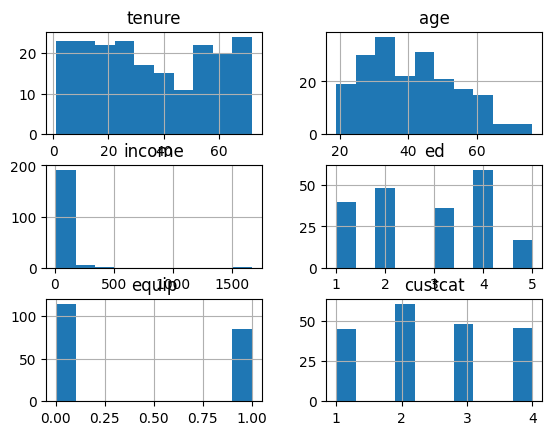

<Figure size 1200x1500 with 0 Axes>

In [41]:
viz = df[['tenure', 'age', 'income', 'ed', 'equip','custcat']]
viz.hist()
plt.figure(figsize=(12,15))
plt.show()

<Axes: xlabel='tenure', ylabel='churn'>

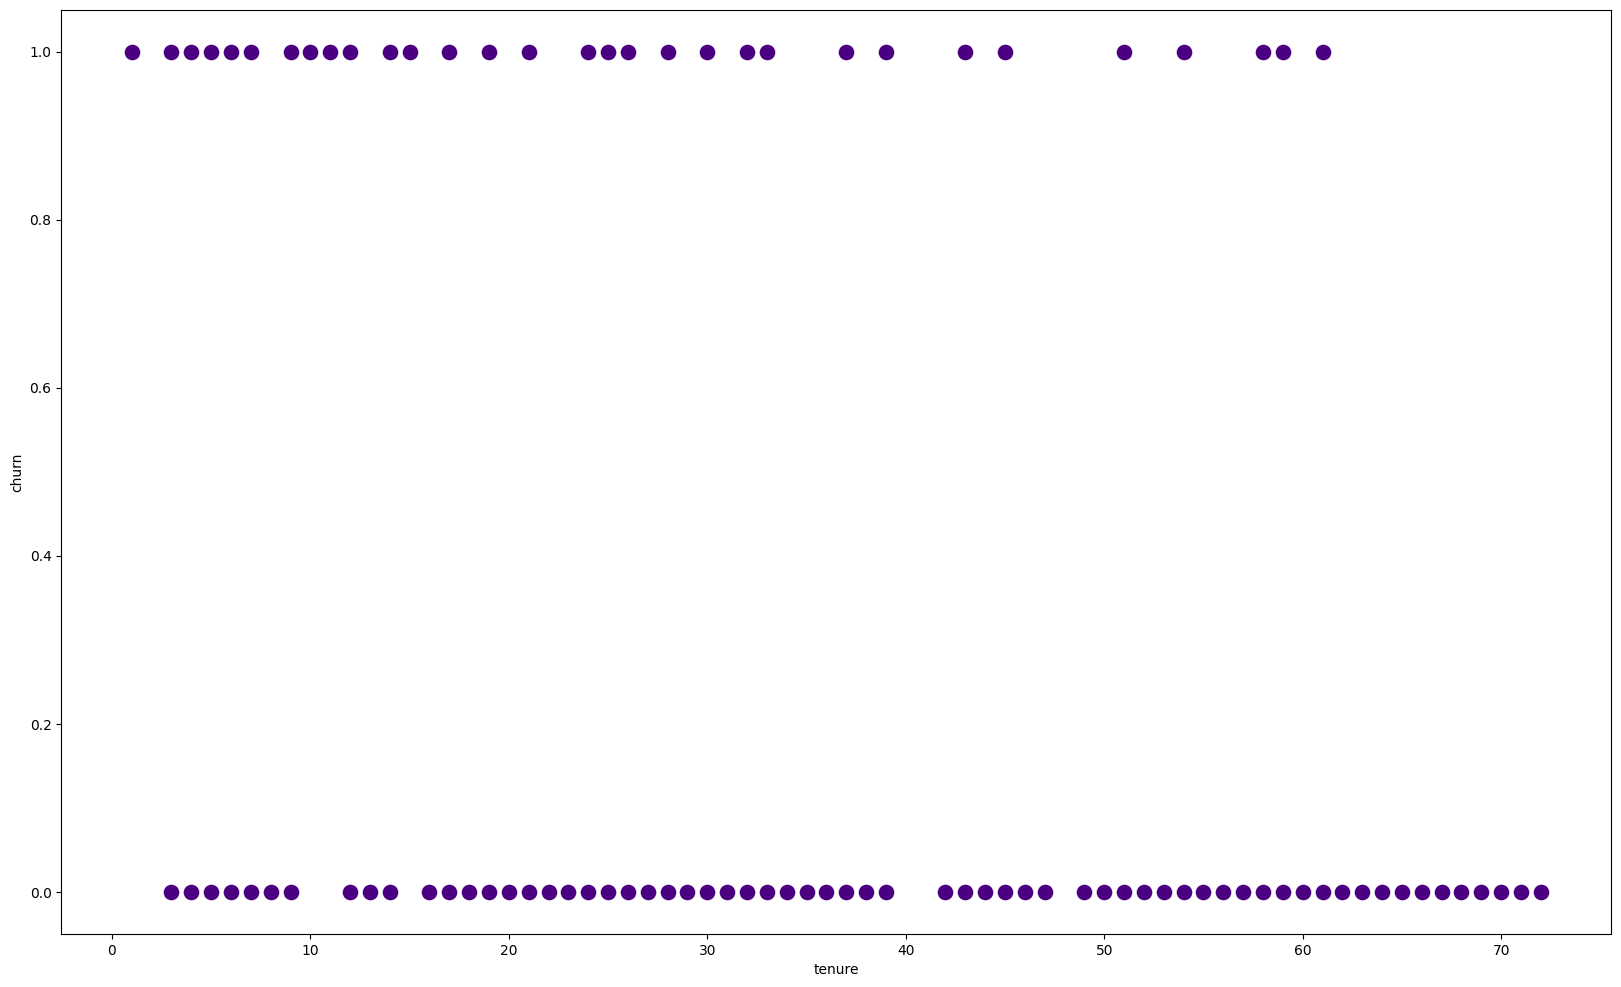

In [42]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='tenure', y='churn', data=df, color= 'indigo', s=150)

### Normalize Data

In [43]:
scaler = StandardScaler()
scaler.fit(df.drop('churn', axis=1))
scaled_features = scaler.transform(df.drop('churn',axis=1))
df_normalized= pd.DataFrame(scaled_features,columns=df.drop('churn', axis=1).columns)
df_normalized.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
0,-1.135184,-0.625955,-0.458897,0.475142,1.696129,-0.584778,-0.859727,0.646869,1.564697,-0.749227,...,1.545908,1.623688,-0.886405,1.094442,1.083473,-0.886405,-0.975096,-0.699872,1.281504,1.416309
1,-0.116043,-0.625955,0.034541,-0.328861,-0.643359,-1.144375,-0.859727,-1.545908,-0.639101,-0.237186,...,-0.646869,-0.615882,-0.886405,-0.913708,-0.922958,-0.886405,0.072267,0.038582,-0.604814,-1.369872
2,-0.579289,-0.855944,-0.261522,-0.352278,-1.423189,-0.920536,-0.859727,-1.545908,-0.639101,-0.556578,...,-0.646869,-0.615882,-0.886405,-0.913708,1.083473,-0.886405,-0.482945,0.038582,-0.732700,0.487582
3,0.115580,-0.472629,-0.656272,0.006791,-0.643359,-0.025182,1.163160,0.646869,1.564697,-0.581926,...,1.545908,1.623688,1.128152,1.094442,1.083473,1.128152,-0.539152,2.061302,0.506195,1.416309
4,-1.320483,-0.472629,0.231916,0.038015,-0.643359,0.534415,-0.859727,0.646869,-0.639101,-0.475463,...,1.545908,-0.615882,-0.886405,1.094442,1.083473,-0.886405,-0.319809,-0.492962,0.574135,0.487582


In [44]:
X_train, X_test,y_train, y_test = train_test_split(
    df_normalized[['tenure', 'age', 'income', 'ed', 'equip','custcat']],
	df['churn'],
	test_size=0.20)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 6) (160,)
Test set: (40, 6) (40,)


In [45]:
X_train[0:5]

,tenure,age,income,ed,equip,custcat
34,-0.810912,2.133920,-0.133714,0.136470,1.163160,1.416309
139,-0.857237,-0.012649,-0.367890,0.916299,-0.859727,-1.369872
147,1.597967,-0.472629,-0.211773,-0.643359,-0.859727,-0.441145
32,-0.625614,-0.549292,-0.227385,0.136470,1.163160,-0.441145
135,1.690616,1.597277,0.685900,1.696129,1.163160,1.416309


### Model

In [46]:
logreg = LogisticRegression()

In [47]:
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [48]:
y_pred

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0.])

In [49]:
# probabilities of predictions
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob[0:5]

array([[0.63099716, 0.36900284],
       [0.84133007, 0.15866993],
       [0.43880046, 0.56119954],
       [0.83639779, 0.16360221],
       [0.273806  , 0.726194  ]])

### Evaluation

In [50]:
accuracy_score(y_test,y_pred)

0.725

In [51]:
confusion_matrix(y_test, y_pred)

array([[25,  3],
       [ 8,  4]], dtype=int64)

Confusion matrix, without normalization
[[25  3]
 [ 8  4]]
Normalized confusion matrix
[[0.89285714 0.10714286]
 [0.66666667 0.33333333]]


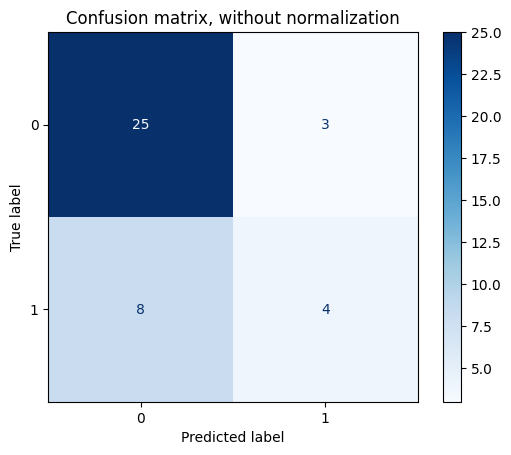

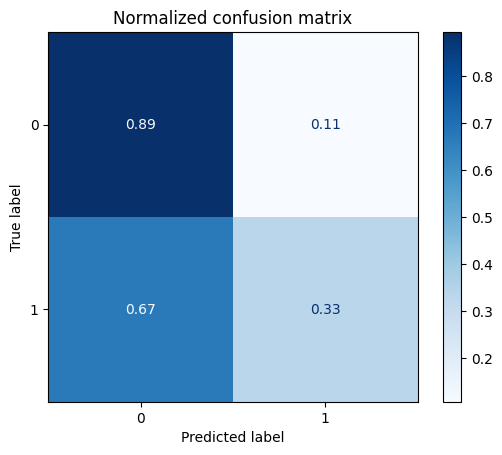

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay


titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        logreg,
        X_test,
        y_test,
        display_labels=[0,1],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [53]:
# jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred, pos_label=0)

0.6944444444444444

In [54]:
# Log loss
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_prob)

0.5154942351744374

In [55]:
from sklearn.metrics import f1_score
round(f1_score(y_test,y_pred,labels=[0,1], average='weighted'),2)

0.7

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.57      0.33      0.42        12

    accuracy                           0.73        40
   macro avg       0.66      0.61      0.62        40
weighted avg       0.70      0.72      0.70        40



### Another Model

In [57]:
logreg_2 = LogisticRegression(solver='liblinear')

In [58]:
logreg_2.fit(X_train, y_train)

y_pred = logreg_2.predict(X_test)

In [59]:
y_pred_prob = logreg.predict_proba(X_test)


### Evaluation

In [60]:
# jaccard index
jaccard_score(y_test, y_pred, pos_label=0)

0.6857142857142857

In [61]:
log_loss(y_test, y_pred_prob)

0.5154942351744374

In [62]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.56      0.42      0.48        12

    accuracy                           0.73        40
   macro avg       0.66      0.64      0.64        40
weighted avg       0.71      0.72      0.71        40



Confusion matrix, without normalization
[[24  4]
 [ 7  5]]
Normalized confusion matrix
[[0.85714286 0.14285714]
 [0.58333333 0.41666667]]


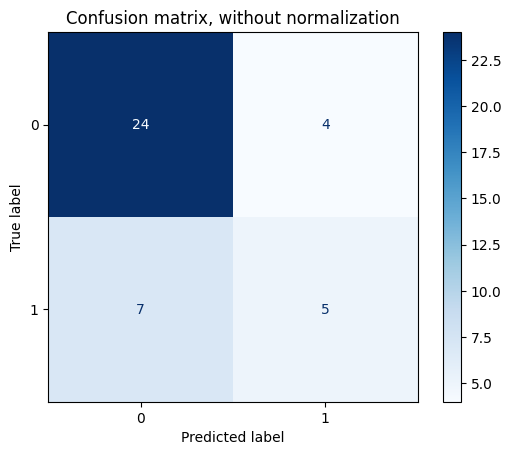

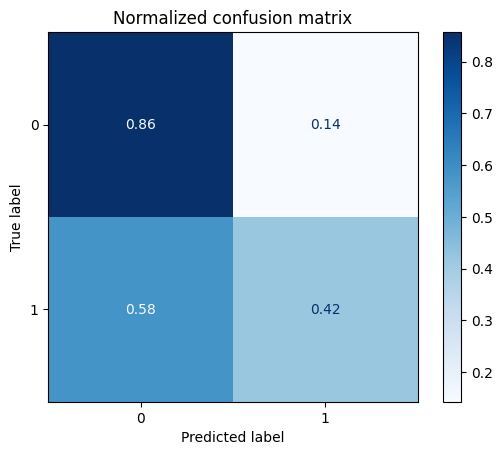

In [63]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        logreg_2,
        X_test,
        y_test,
        display_labels=[0,1],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()